In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [12]:
df = pd.read_csv('culture.csv')

In [13]:
df.head()

,Name,Hair Dark,Hair Light,Hair Red,Hair Blue,Hair Length,Hair Bang,Face Vibes,Eye Black,Eye Brown,...,Eye Size,Blush,Tsundere,Kindness,Breast Size,Hip Size,Mass,Exposure,Skin Darkness,TARGET_VALUE
0,Erza Scarlet,0,0,1,0,0.65,1,0.6,1,0,...,0.45,0,0.35,0.70,0.60,0.60,0.65,0.35,0.60,0
1,Tsumiki Miniwa,0,0,0,1,0.95,1,0.3,0,0,...,0.70,1,1.00,0.50,0.05,0.10,0.05,0.50,0.40,0
2,Nezuko Kamado,1,0,0,0,0.75,0,0.4,0,0,...,0.60,0,0.00,0.70,0.05,0.10,0.20,0.05,0.40,0
3,Mai Sakurajima,1,0,0,0,0.70,1,0.5,0,0,...,0.65,1,0.55,0.75,0.55,0.60,0.60,0.70,0.40,1
4,Shinobu Kocho,1,0,0,0,0.25,0,0.6,0,0,...,0.75,0,0.00,0.60,0.55,0.65,0.65,0.15,0.45,0


In [14]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           50 non-null     object 
 1   Hair Dark      50 non-null     int64  
 2   Hair Light     50 non-null     int64  
 3   Hair Red       50 non-null     int64  
 4   Hair Blue      50 non-null     int64  
 5   Hair Length    50 non-null     float64
 6   Hair Bang      50 non-null     int64  
 7   Face Vibes     50 non-null     float64
 8   Eye Black      50 non-null     int64  
 9   Eye Brown      50 non-null     int64  
 10  Eye Blue       50 non-null     int64  
 11  Eye Red        50 non-null     int64  
 12  Eye Purple     50 non-null     int64  
 13  Eye Size       50 non-null     float64
 14  Blush          50 non-null     int64  
 15  Tsundere       50 non-null     float64
 16  Kindness       50 non-null     float64
 17  Breast Size    50 non-null     float64
 18  Hip Size    

,Hair Dark,Hair Light,Hair Red,Hair Blue,Hair Length,Hair Bang,Face Vibes,Eye Black,Eye Brown,Eye Blue,...,Eye Size,Blush,Tsundere,Kindness,Breast Size,Hip Size,Mass,Exposure,Skin Darkness,TARGET_VALUE
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,...,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000,50.000000
mean,0.440000,0.280000,0.180000,0.100000,0.560000,0.900000,0.512000,0.220000,0.180000,0.340000,...,0.523000,0.320000,0.483000,0.634000,0.507000,0.519000,0.534000,0.58700,0.492000,0.440000
std,0.501427,0.453557,0.388088,0.303046,0.190863,0.303046,0.184767,0.418452,0.388088,0.478518,...,0.129445,0.471212,0.251447,0.166733,0.214764,0.183473,0.158578,0.17665,0.100691,0.501427
min,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.100000,0.000000,0.000000,0.000000,...,0.300000,0.000000,0.000000,0.050000,0.050000,0.100000,0.050000,0.05000,0.200000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.362500,1.000000,0.350000,0.000000,0.000000,0.000000,...,0.400000,0.000000,0.312500,0.550000,0.412500,0.400000,0.450000,0.50000,0.450000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.625000,1.000000,0.500000,0.000000,0.000000,0.000000,...,0.500000,0.000000,0.500000,0.675000,0.550000,0.550000,0.550000,0.60000,0.500000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,0.700000,1.000000,0.650000,0.000000,0.000000,1.000000,...,0.650000,1.000000,0.700000,0.750000,0.650000,0.650000,0.650000,0.73750,0.600000,1.000000
max,1.000000,1.000000,1.000000,1.000000,0.950000,1.000000,0.900000,1.000000,1.000000,1.000000,...,0.750000,1.000000,1.000000,0.950000,0.900000,0.800000,0.750000,0.90000,0.600000,1.000000


In [15]:
df.drop('Name', axis=1, inplace=True)

In [16]:
df.head()

,Hair Dark,Hair Light,Hair Red,Hair Blue,Hair Length,Hair Bang,Face Vibes,Eye Black,Eye Brown,Eye Blue,...,Eye Size,Blush,Tsundere,Kindness,Breast Size,Hip Size,Mass,Exposure,Skin Darkness,TARGET_VALUE
0,0,0,1,0,0.65,1,0.6,1,0,0,...,0.45,0,0.35,0.70,0.60,0.60,0.65,0.35,0.60,0
1,0,0,0,1,0.95,1,0.3,0,0,0,...,0.70,1,1.00,0.50,0.05,0.10,0.05,0.50,0.40,0
2,1,0,0,0,0.75,0,0.4,0,0,0,...,0.60,0,0.00,0.70,0.05,0.10,0.20,0.05,0.40,0
3,1,0,0,0,0.70,1,0.5,0,0,0,...,0.65,1,0.55,0.75,0.55,0.60,0.60,0.70,0.40,1
4,1,0,0,0,0.25,0,0.6,0,0,0,...,0.75,0,0.00,0.60,0.55,0.65,0.65,0.15,0.45,0


/Users/daeyong/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


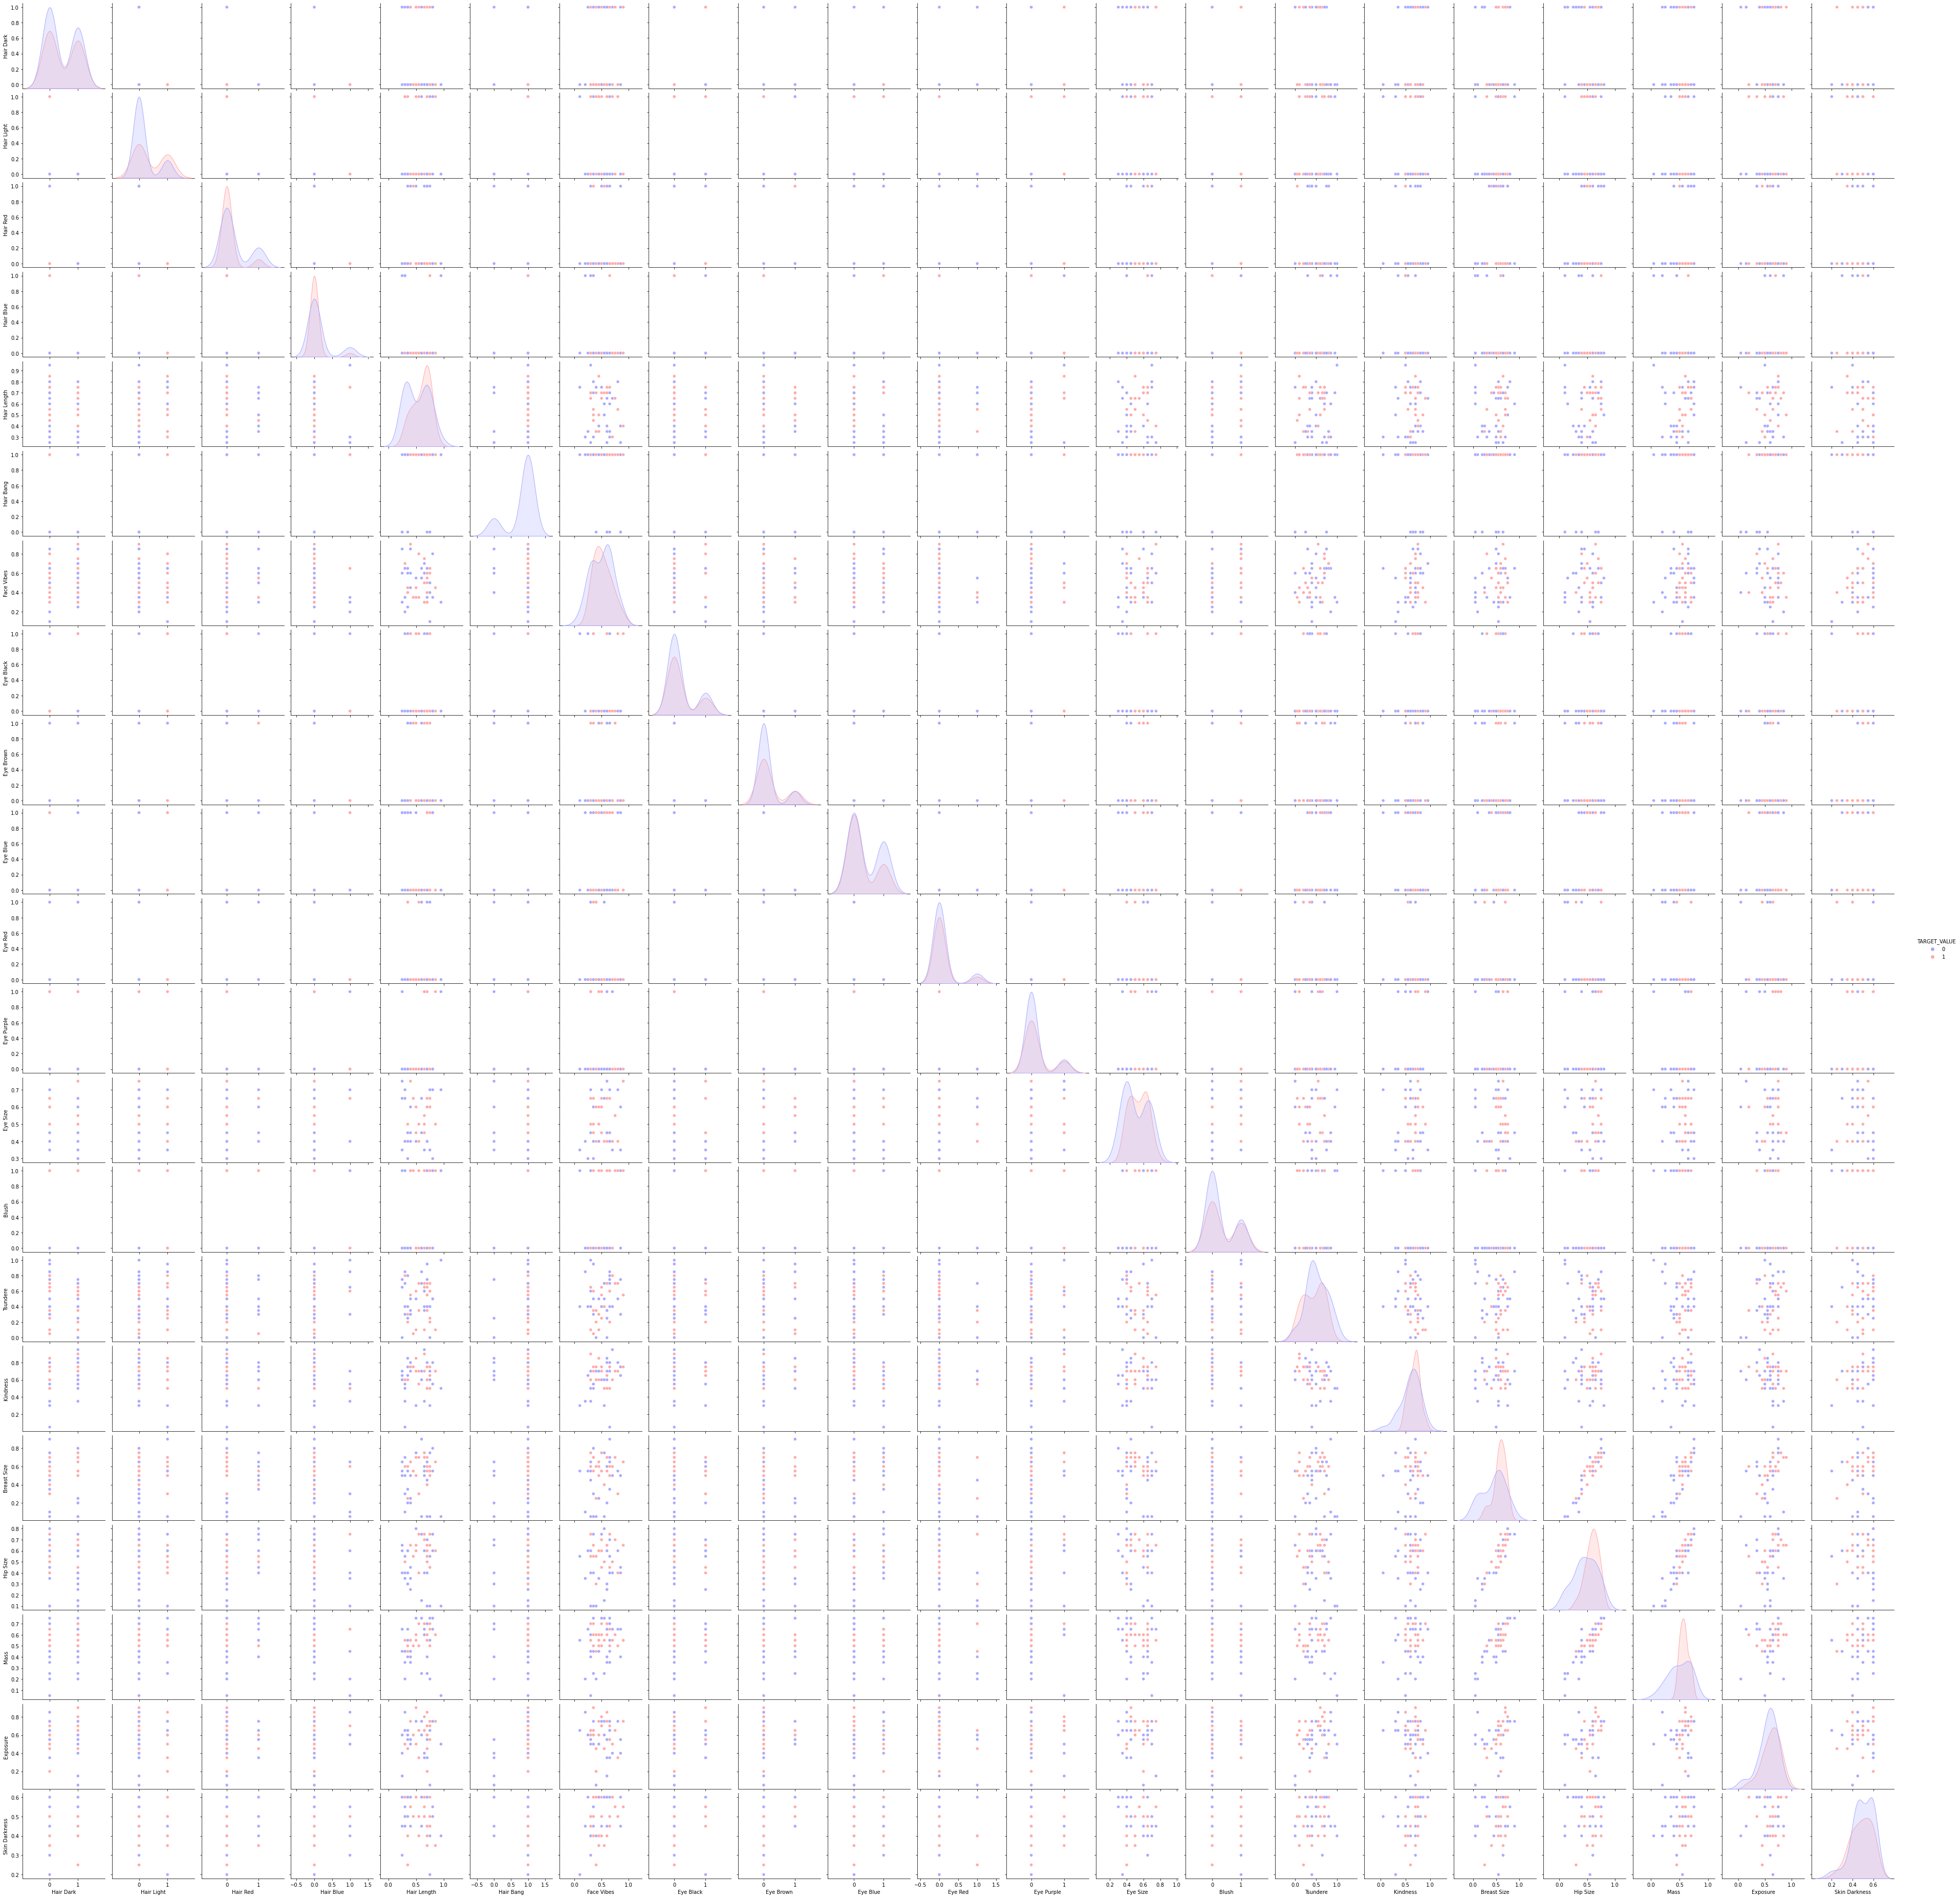

In [17]:
sns.pairplot(df,hue='TARGET_VALUE', palette='bwr')

<AxesSubplot:>

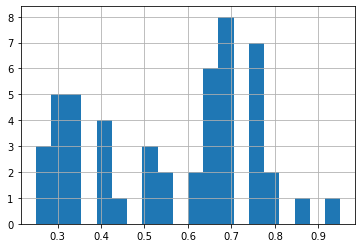

In [18]:
df['Hair Length'].hist(bins=20)

<AxesSubplot:>

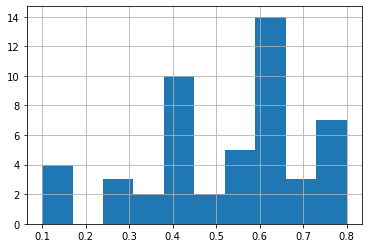

In [22]:
df['Hip Size'].hist()

<AxesSubplot:>

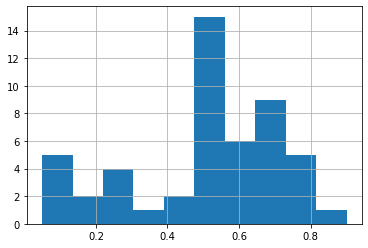

In [24]:
df['Breast Size'].hist()

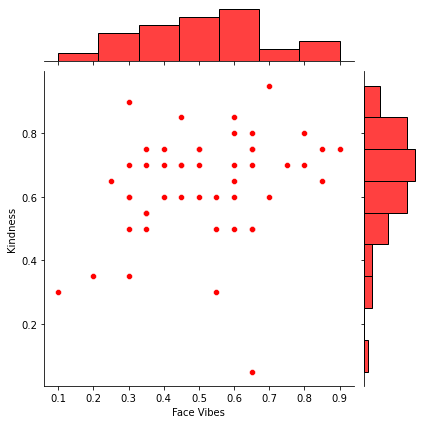

In [28]:
sns.jointplot(x='Face Vibes', y='Kindness', data=df, color='red')

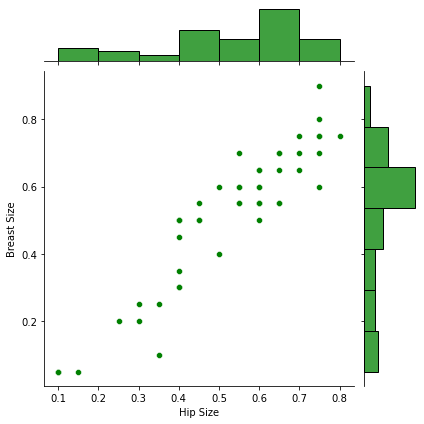

In [29]:
sns.jointplot(x='Hip Size', y='Breast Size', data=df, color='green')

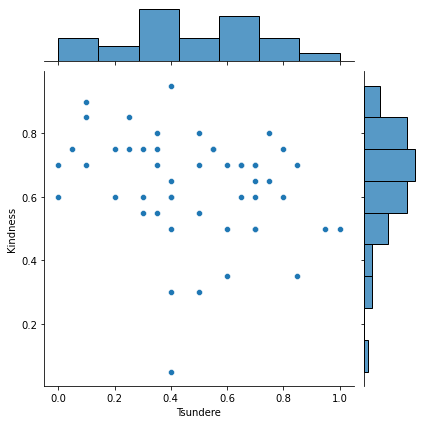

In [30]:
sns.jointplot(x='Tsundere', y='Kindness', data=df)

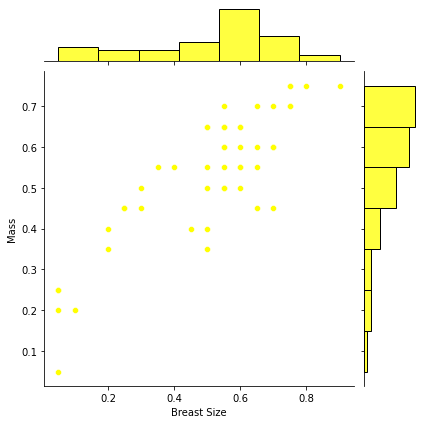

In [31]:
sns.jointplot(x='Breast Size', y='Mass', data=df, color='yellow')

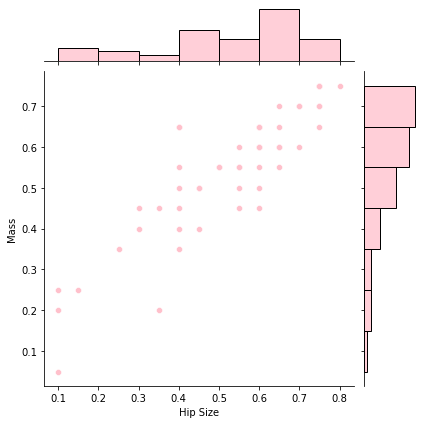

In [32]:
sns.jointplot(x='Hip Size', y='Mass', data=df, color='pink')

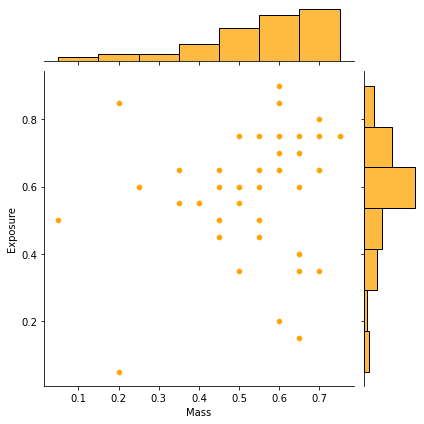

In [34]:
sns.jointplot(x='Mass', y='Exposure', data=df, color='orange')

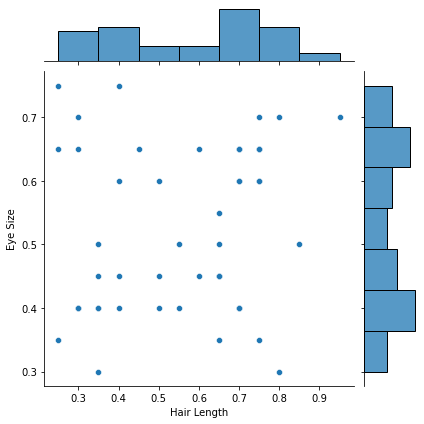

In [35]:
sns.jointplot(x='Hair Length', y='Eye Size', data=df)

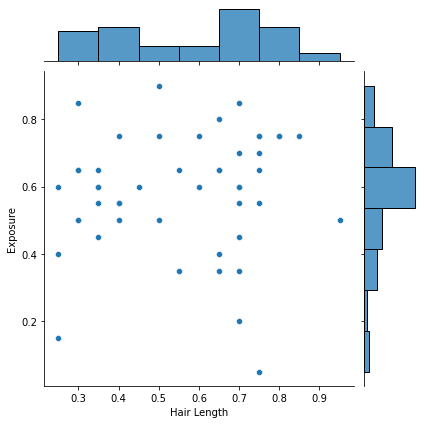

In [36]:
sns.jointplot(x='Hair Length', y='Exposure', data=df)

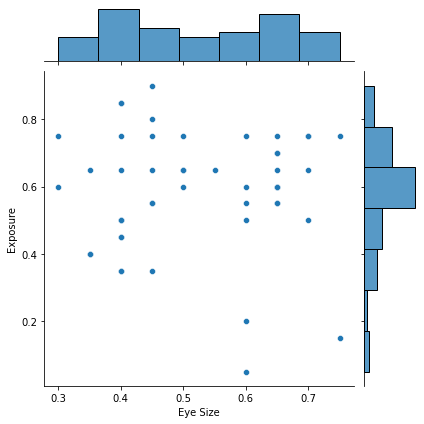

In [37]:
sns.jointplot(x='Eye Size', y='Exposure', data=df)

In [38]:
x=df[['Hair Dark', 'Hair Light', 'Hair Red', 'Hair Blue', 'Hair Length', 'Hair Bang', 'Face Vibes', 'Eye Black', 'Eye Brown', 'Eye Blue', 'Eye Red', 'Eye Purple', 'Eye Size', 'Blush', 'Tsundere', 'Kindness', 'Breast Size', 'Hip Size', 'Mass', 'Exposure', 'Skin Darkness']]

In [39]:
y=df['TARGET_VALUE']

In [56]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=101)

In [57]:
model = LogisticRegression()

In [58]:
model.fit(x_train, y_train)

LogisticRegression()

In [59]:
predictions = model.predict(x_test)

In [60]:
predictions

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0])

In [61]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.64      0.88      0.74         8
           1       0.75      0.43      0.55         7

    accuracy                           0.67        15
   macro avg       0.69      0.65      0.64        15
weighted avg       0.69      0.67      0.65        15



In [62]:
print(confusion_matrix(y_test,predictions))

[[7 1]
 [4 3]]


In [64]:
model.predict_proba(x_test)

array([[0.56802657, 0.43197343],
       [0.67506268, 0.32493732],
       [0.45768415, 0.54231585],
       [0.8288908 , 0.1711092 ],
       [0.53689336, 0.46310664],
       [0.7675954 , 0.2324046 ],
       [0.45059628, 0.54940372],
       [0.55724451, 0.44275549],
       [0.74803987, 0.25196013],
       [0.46925494, 0.53074506],
       [0.74776272, 0.25223728],
       [0.41599427, 0.58400573],
       [0.59861477, 0.40138523],
       [0.569071  , 0.430929  ],
       [0.58040908, 0.41959092]])

In [65]:
x_test

,Hair Dark,Hair Light,Hair Red,Hair Blue,Hair Length,Hair Bang,Face Vibes,Eye Black,Eye Brown,Eye Blue,...,Eye Purple,Eye Size,Blush,Tsundere,Kindness,Breast Size,Hip Size,Mass,Exposure,Skin Darkness
37,1,0,0,0,0.40,1,0.90,1,0,0,...,0,0.75,1,0.55,0.75,0.65,0.65,0.55,0.75,0.55
14,0,0,1,0,0.50,1,0.55,0,0,1,...,0,0.40,0,0.50,0.30,0.75,0.80,0.75,0.75,0.60
21,0,1,0,0,0.70,1,0.30,0,1,0,...,0,0.65,0,0.65,0.60,0.60,0.55,0.55,0.60,0.45
32,1,0,0,0,0.25,0,0.85,0,0,1,...,0,0.35,0,0.75,0.65,0.50,0.40,0.65,0.40,0.60
22,1,0,0,0,0.35,1,0.25,1,0,0,...,0,0.30,0,0.40,0.65,0.55,0.60,0.65,0.60,0.60
1,0,0,0,1,0.95,1,0.30,0,0,0,...,1,0.70,1,1.00,0.50,0.05,0.10,0.05,0.50,0.40
26,1,0,0,0,0.65,1,0.50,0,0,0,...,1,0.45,0,0.65,0.70,0.75,0.70,0.70,0.80,0.60
46,1,0,0,0,0.60,1,0.55,0,0,0,...,0,0.65,0,0.70,0.60,0.05,0.15,0.25,0.60,0.60
42,0,0,0,1,0.30,1,0.20,0,0,1,...,0,0.40,0,0.85,0.35,0.10,0.35,0.20,0.85,0.45
47,1,0,0,0,0.80,1,0.35,0,0,1,...,0,0.30,0,0.50,0.55,0.80,0.75,0.75,0.75,0.55


In [66]:
model.predict_proba([[1,0,0,0,0.65,1,0.75,0,1,0,0,0,0.55,1,0.7,0.7,0.7,0.7,0.6,0.65,0.55]])

array([[0.59861477, 0.40138523]])

In [67]:
df.drop(['Hair Dark', 'Hair Light', 'Hair Red', 'Hair Blue', 'Eye Black', 'Eye Brown', 'Eye Blue','Eye Red', 'Eye Purple'], axis=1, inplace=True)

In [68]:
df.head()

,Hair Length,Hair Bang,Face Vibes,Eye Size,Blush,Tsundere,Kindness,Breast Size,Hip Size,Mass,Exposure,Skin Darkness,TARGET_VALUE
0,0.65,1,0.6,0.45,0,0.35,0.70,0.60,0.60,0.65,0.35,0.60,0
1,0.95,1,0.3,0.70,1,1.00,0.50,0.05,0.10,0.05,0.50,0.40,0
2,0.75,0,0.4,0.60,0,0.00,0.70,0.05,0.10,0.20,0.05,0.40,0
3,0.70,1,0.5,0.65,1,0.55,0.75,0.55,0.60,0.60,0.70,0.40,1
4,0.25,0,0.6,0.75,0,0.00,0.60,0.55,0.65,0.65,0.15,0.45,0


In [72]:
x=df[['Hair Length', 'Hair Bang', 'Face Vibes', 'Eye Size', 'Blush', 'Tsundere', 'Kindness', 'Breast Size', 'Hip Size', 'Mass', 'Exposure', 'Skin Darkness']]

In [73]:
y=df['TARGET_VALUE']

In [74]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=101)

In [76]:
model_1_0_1 = LogisticRegression()

In [77]:
model_1_0_1.fit(x_train, y_train)

LogisticRegression()

In [78]:
predictions = model_1_0_1.predict(x_test)

In [79]:
predictions

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0])

In [80]:
print(confusion_matrix(y_test, predictions))

[[6 2]
 [5 2]]


In [81]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.55      0.75      0.63         8
           1       0.50      0.29      0.36         7

    accuracy                           0.53        15
   macro avg       0.52      0.52      0.50        15
weighted avg       0.52      0.53      0.51        15



In [82]:
predictions = model_1_0_1.predict_proba(x_test)

In [83]:
predictions

array([[0.56294118, 0.43705882],
       [0.4837466 , 0.5162534 ],
       [0.51986687, 0.48013313],
       [0.81820239, 0.18179761],
       [0.51640282, 0.48359718],
       [0.71541876, 0.28458124],
       [0.46568308, 0.53431692],
       [0.67910071, 0.32089929],
       [0.66776863, 0.33223137],
       [0.42443097, 0.57556903],
       [0.55568425, 0.44431575],
       [0.49231982, 0.50768018],
       [0.54070665, 0.45929335],
       [0.53971419, 0.46028581],
       [0.54513659, 0.45486341]])

In [85]:
x_test


,Hair Length,Hair Bang,Face Vibes,Eye Size,Blush,Tsundere,Kindness,Breast Size,Hip Size,Mass,Exposure,Skin Darkness
37,0.40,1,0.90,0.75,1,0.55,0.75,0.65,0.65,0.55,0.75,0.55
14,0.50,1,0.55,0.40,0,0.50,0.30,0.75,0.80,0.75,0.75,0.60
21,0.70,1,0.30,0.65,0,0.65,0.60,0.60,0.55,0.55,0.60,0.45
32,0.25,0,0.85,0.35,0,0.75,0.65,0.50,0.40,0.65,0.40,0.60
22,0.35,1,0.25,0.30,0,0.40,0.65,0.55,0.60,0.65,0.60,0.60
1,0.95,1,0.30,0.70,1,1.00,0.50,0.05,0.10,0.05,0.50,0.40
26,0.65,1,0.50,0.45,0,0.65,0.70,0.75,0.70,0.70,0.80,0.60
46,0.60,1,0.55,0.65,0,0.70,0.60,0.05,0.15,0.25,0.60,0.60
42,0.30,1,0.20,0.40,0,0.85,0.35,0.10,0.35,0.20,0.85,0.45
47,0.80,1,0.35,0.30,0,0.50,0.55,0.80,0.75,0.75,0.75,0.55


In [86]:
df.drop(['Hair Bang', 'Face Vibes', 'Eye Size','Skin Darkness'], axis=1, inplace=True)

In [87]:
df.head()

,Hair Length,Blush,Tsundere,Kindness,Breast Size,Hip Size,Mass,Exposure,TARGET_VALUE
0,0.65,0,0.35,0.70,0.60,0.60,0.65,0.35,0
1,0.95,1,1.00,0.50,0.05,0.10,0.05,0.50,0
2,0.75,0,0.00,0.70,0.05,0.10,0.20,0.05,0
3,0.70,1,0.55,0.75,0.55,0.60,0.60,0.70,1
4,0.25,0,0.00,0.60,0.55,0.65,0.65,0.15,0


In [88]:
x=df[['Hair Length', 'Blush', 'Tsundere', 'Kindness', 'Breast Size', 'Hip Size', 'Mass', 'Exposure']]

In [89]:
y=df['TARGET_VALUE']

In [134]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state = 101)

In [135]:
model_1_0_2 = LogisticRegression()

In [136]:
model_1_0_2.fit(x_train, y_train)

LogisticRegression()

In [137]:
predictions = model_1_0_2.predict(x_test)

In [138]:
predictions

array([1, 1, 0, 0, 0, 0, 1, 0, 0, 1])

In [139]:
print(confusion_matrix(y_test, predictions))

[[5 2]
 [1 2]]


In [140]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.71      0.77         7
           1       0.50      0.67      0.57         3

    accuracy                           0.70        10
   macro avg       0.67      0.69      0.67        10
weighted avg       0.73      0.70      0.71        10



In [141]:
predictions = model_1_0_2.predict_proba(x_test)

In [142]:
predictions

array([[0.47375876, 0.52624124],
       [0.46460179, 0.53539821],
       [0.52820733, 0.47179267],
       [0.64025805, 0.35974195],
       [0.52790943, 0.47209057],
       [0.703183  , 0.296817  ],
       [0.4470832 , 0.5529168 ],
       [0.69657516, 0.30342484],
       [0.70825909, 0.29174091],
       [0.40916584, 0.59083416]])